In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 7 and X[cname].dtype == "object"]


# Select numeric columns
numeric_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = numeric_cols + categorical_cols
X = X[my_cols].copy()
X_test = X_test_full[my_cols].copy()


In [2]:
import sklearn.metrics

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
import numpy as np

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    
                           ('imputer', SimpleImputer(strategy='most_frequent')),
                           ('onehot', OneHotEncoder(handle_unknown='ignore'))
 ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [4]:
X = pd.DataFrame(preprocessor.fit_transform(X))
X_test_final = pd.DataFrame(preprocessor.transform(X_test))

In [5]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
for column in X.columns:
    
    X[column] = X[column]/X[column].max()
    
    divisor2 = X_test_final[column].max()
    
    if divisor2 == 0:
        
        divisor2 = 1
    
    X_test_final[column] = X_test_final[column]/divisor2
    

In [7]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,0.105263,0.400,0.205336,0.5,0.666667,0.975622,0.975622,0.000000,0.116708,0.094364,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.105263,0.405,0.252067,0.6,0.666667,0.974129,0.974129,0.083721,0.230175,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.315789,0.370,0.244346,0.5,0.555556,0.993532,0.994030,0.000000,0.197257,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.315789,0.390,0.176290,0.6,0.666667,0.994030,0.994030,0.015504,0.150125,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.631579,0.215,0.088428,0.8,0.555556,0.991045,0.991045,0.000000,0.065586,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.842105,0.105,0.034205,0.4,0.777778,0.980100,0.980100,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.842105,0.105,0.033463,0.4,0.555556,0.980100,0.980100,0.000000,0.062843,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.105263,0.800,0.353357,0.5,0.777778,0.975124,0.993035,0.000000,0.305237,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.447368,0.310,0.184470,0.5,0.555556,0.991045,0.991045,0.000000,0.084040,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Using TensorFlow backend.
183

Train on 1168 samples, validate on 292 samples
Epoch 1/5000
1168/1168 [==============================] - 1s 668us/step - loss: 180585.1991 - val_loss: 182218.9634
Epoch 2/5000
1168/1168 [==============================] - 0s 145us/step - loss: 180338.6881 - val_loss: 181336.0803
Epoch 3/5000
1168/1168 [==============================] - 0s 109us/step - loss: 176494.5317 - val_loss: 171175.3564
Epoch 4/5000
1168/1168 [==============================] - 0s 124us/step - loss: 148514.3401 - val_loss: 112020.8078
Epoch 5/5000
1168/1168 [==============================] - 0s 171us/step - loss: 67312.4824 - val_loss: 52036.3126
Epoch 6/5000
1168/1168 [==============================] - 0s 143us/step - loss: 48101.6057 - val_loss: 46501.7234
Epoch 7/5000
1168/1168 [==============================] - 0s 160us/step - loss: 44319.8065 - val_loss: 43089.5110
Epoch 8/5000
1168/1168 [==============================] - 0s 137us/step - loss: 41260.0485 - val_loss: 40110.4468
Ep

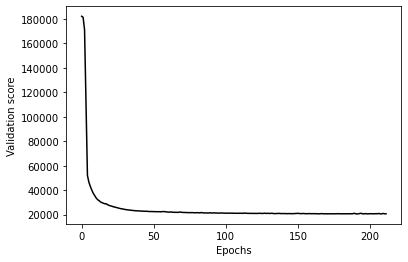

In [9]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


early_stopping_monitor = EarlyStopping(patience=20)

# Specify the model

n_cols = X.shape[1]
print(n_cols)
model = Sequential()

model.add(Dense(59, activation='relu', input_shape = (n_cols,)))
model.add(Dense(59, activation='relu'))
model.add(Dense(59, activation='relu'))
model.add(Dense(59, activation='relu'))
model.add(Dense(1))

# Compile the model

model.compile(optimizer='adam', loss='mae')

history = model.fit(X, y, epochs=5000, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=True)  #50 y 3 --> 21500


plt.plot(history.history['val_loss'], 'black')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# batch size: Define el número de patrones a los que se expone la red antes de que se actualicen las ponderaciones dentro de un epoch. También es una optimización de la eficiencia, asegurando que no se carguen demasiados patrones de entrada en la memoria a la vez.


In [10]:
prediccioneskeras = model.predict(X_test_final)

In [11]:
prediccioneskeras

array([[142650.8 ],
       [184882.31],
       [187682.67],
       ...,
       [181923.17],
       [125672.58],
       [205640.31]], dtype=float32)

In [12]:
prediccioneskeras.shape

(1459, 1)

In [13]:
prediccioneskeras = prediccioneskeras.ravel()

In [14]:
prediccioneskeras.shape

(1459,)

In [15]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index, #Importante que sea el del X_test original pq tiene el index original.
                       'SalePrice': prediccioneskeras
                      })
output.to_csv('Neuronales.csv', index=False)